<img src="https://i.imgur.com/6U6q5jQ.png"/>

# Data Reshaping in Python


Let me get the data on dengue from [Peru](https://www.datosabiertos.gob.pe/dataset/vigilancia-epidemiol%C3%B3gica-de-dengue):

In [1]:
import pandas as pd
import os

# dengue = pd.read_csv(os.path.join('FilesToReshape' , "datos_abiertos_vigilancia_dengue.csv"))

In [ ]:
dengue = pd.read_csv(os.path.join('FilesToReshape' , "datos_abiertos_vigilancia_dengue.csv"),on_bad_lines='warn')

Pandas offers **on_bad_lines='warn'** to let you know if something does not make sense. As you see, you have 8 lines that were omitted. This is what you have now:

In [ ]:
dengue.shape

You can try in a different way:

In [ ]:
dengue2=pd.read_table(os.path.join('FilesToReshape' , "datos_abiertos_vigilancia_dengue.csv"))
dengue2

You did not get a warning, and in fact you got 8 more rows. You can try to identify what is wrong:

In [ ]:
dengue2.iloc[87867:87873,0]

In [ ]:
# use that weird text:
dengue2[dengue2.iloc[:,0].str.contains("I\\,II",regex=False)]

I have prepared a cleaner version:

In [2]:
dengue = pd.read_csv(os.path.join('FilesToReshape' , "datos_abiertos_vigilancia_dengue_ok.csv"))
dengue.info()

/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_23558/4080489231.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dengue = pd.read_csv(os.path.join('FilesToReshape' , "datos_abiertos_vigilancia_dengue_ok.csv"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501692 entries, 0 to 501691
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   departamento  501692 non-null  object 
 1   provincia     501692 non-null  object 
 2   distrito      501692 non-null  object 
 3   localidad     400753 non-null  object 
 4   enfermedad    501692 non-null  object 
 5   ano           501692 non-null  int64  
 6   semana        501692 non-null  int64  
 7   diagnostic    501692 non-null  object 
 8   diresa        501669 non-null  float64
 9   ubigeo        501692 non-null  int64  
 10  localcod      407822 non-null  object 
 11  edad          501692 non-null  int64  
 12  tipo_edad     501692 non-null  object 
 13  sexo          501692 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 53.6+ MB


In [3]:
dengue = pd.read_csv(os.path.join('FilesToReshape' , "datos_abiertos_vigilancia_dengue_ok.csv"),encoding='utf-8', engine='python')
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501692 entries, 0 to 501691
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   departamento  501692 non-null  object 
 1   provincia     501692 non-null  object 
 2   distrito      501692 non-null  object 
 3   localidad     400753 non-null  object 
 4   enfermedad    501692 non-null  object 
 5   ano           501692 non-null  int64  
 6   semana        501692 non-null  int64  
 7   diagnostic    501692 non-null  object 
 8   diresa        501669 non-null  float64
 9   ubigeo        501692 non-null  int64  
 10  localcod      407822 non-null  object 
 11  edad          501692 non-null  int64  
 12  tipo_edad     501692 non-null  object 
 13  sexo          501692 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 53.6+ MB


In [4]:
dengue.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,ano,semana,diresa,ubigeo,edad
count,501692.00000,501692.00000,501669.00000,501692.00000,501692.00000
mean,2014.77260,22.00057,22.06243,167285.48278,268.97688
std,6.14420,14.76501,9.72385,63785.83505,117745.13157
min,2000.00000,1.00000,2.00000,10101.00000,0.00000
25%,2011.00000,11.00000,16.00000,130201.00000,15.00000
50%,2016.00000,18.00000,22.00000,170101.00000,26.00000
75%,2020.00000,32.00000,31.00000,200601.00000,41.00000
max,2022.00000,53.00000,99.00000,999999.00000,71963641.00000


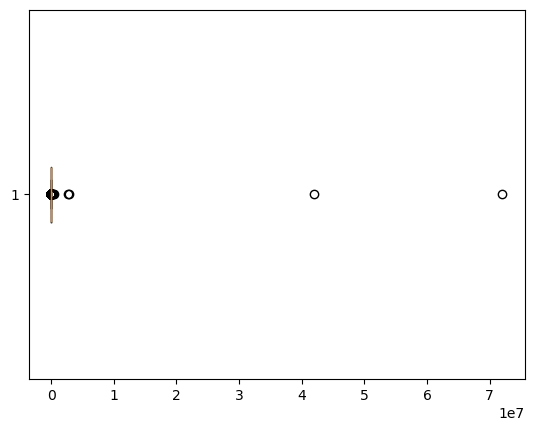

In [5]:
import matplotlib.pyplot as plt
plt.boxplot(dengue.edad, vert=False);

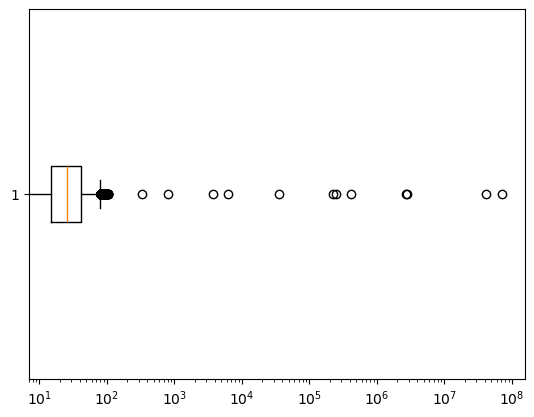

In [6]:
plt.boxplot(dengue.edad, vert=False)
plt.xscale('log')

In [7]:
dengue[dengue.edad>110]

,departamento,provincia,distrito,localidad,enfermedad,ano,semana,diagnostic,diresa,ubigeo,localcod,edad,tipo_edad,sexo
264053,PIURA,PIURA,CASTILLA,URB. MIRAFLORES,DENGUE SIN SEÑALES DE ALARMA,2017,13,A97.0,32.0,200104,2001040028,814,A,F
269208,PIURA,PIURA,LA ARENA,BARRIO 13 DE ABRIL,DENGUE SIN SEÑALES DE ALARMA,2017,16,A97.0,32.0,200109,2001090034,2846395,A,M
272873,PIURA,PIURA,CATACAOS,LA LEGUA,DENGUE SIN SEÑALES DE ALARMA,2017,17,A97.0,32.0,200105,2001050027,2692587,A,M
278721,PIURA,PIURA,PIURA,PIURA,DENGUE SIN SEÑALES DE ALARMA,2017,17,A97.0,32.0,200101,2001010001,330,A,M
278933,PIURA,PIURA,CASTILLA,CASTILLA,DENGUE CON SEÑALES DE ALARMA,2017,17,A97.1,32.0,200104,2001040001,6161,A,M
284506,PIURA,PIURA,PIURA,\N,DENGUE CON SEÑALES DE ALARMA,2017,18,A97.1,32.0,200101,2001010047,3767,A,F
288598,PIURA,PIURA,CURA MORI,CUCUNGARA,DENGUE CON SEÑALES DE ALARMA,2017,20,A97.1,32.0,200107,2001070001,71963641,A,M
288660,PIURA,PIURA,CURA MORI,CUCUNGARA,DENGUE SIN SEÑALES DE ALARMA,2017,20,A97.0,32.0,200107,2001070001,41964604,A,F
289614,PIURA,PIURA,CURA MORI,CUCUNGARA,DENGUE SIN SEÑALES DE ALARMA,2017,20,A97.0,32.0,200107,2001070001,419454,A,M
297904,PIURA,PIURA,CURA MORI,CUCUNGARA,DENGUE SIN SEÑALES DE ALARMA,2017,19,A97.0,32.0,200107,2001070001,249906,A,M


In [8]:
dengue=dengue[dengue.edad<=110]

Let me select a subset of columns:

In [9]:
toSelect=['departamento', 'provincia', 'distrito','ano', 'semana', 'sexo','edad','enfermedad']
dengueSub=dengue[toSelect]
dengueSub.head()

,departamento,provincia,distrito,ano,semana,sexo,edad,enfermedad
0,HUANUCO,LEONCIO PRADO,LUYANDO,2000,47,M,9,DENGUE SIN SEÑALES DE ALARMA
1,HUANUCO,LEONCIO PRADO,LUYANDO,2000,40,F,18,DENGUE SIN SEÑALES DE ALARMA
2,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,2000,48,F,32,DENGUE SIN SEÑALES DE ALARMA
3,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,2000,37,F,40,DENGUE SIN SEÑALES DE ALARMA
4,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAUN,2000,42,M,16,DENGUE SIN SEÑALES DE ALARMA


As we know there were issues with text, let's check department values:

In [10]:
dengueSub.departamento.value_counts()

departamento
PIURA            126400
LORETO            92496
UCAYALI           43707
MADRE DE DIOS     30562
TUMBES            27313
SAN MARTIN        26759
LA LIBERTAD       24377
ICA               21324
CAJAMARCA         19409
JUNIN             19199
LAMBAYEQUE        15618
AMAZONAS          12017
CUSCO             10475
HUANUCO            9046
AYACUCHO           8889
ANCASH             7214
LIMA               4255
PASCO              1963
\N                  444
PUNO                179
CALLAO               26
AREQUIPA              7
MOQUEGUA              1
Name: count, dtype: int64

In [11]:
dengueSub[dengueSub.departamento.str.contains('\\N',regex=False)]

,departamento,provincia,distrito,ano,semana,sexo,edad,enfermedad
79131,\N,\N,\N,2009,1,F,10,DENGUE SIN SEÑALES DE ALARMA
79656,\N,\N,\N,2009,7,M,46,DENGUE SIN SEÑALES DE ALARMA
80500,\N,\N,\N,2009,26,F,42,DENGUE SIN SEÑALES DE ALARMA
84253,\N,\N,\N,2009,28,M,30,DENGUE SIN SEÑALES DE ALARMA
85102,\N,\N,\N,2009,4,F,19,DENGUE SIN SEÑALES DE ALARMA
...,...,...,...,...,...,...,...,...
480825,\N,\N,\N,2022,23,F,73,DENGUE SIN SEÑALES DE ALARMA
486719,\N,\N,\N,2022,33,F,17,DENGUE SIN SEÑALES DE ALARMA
487630,\N,\N,\N,2022,34,M,54,DENGUE SIN SEÑALES DE ALARMA
491395,\N,\N,\N,2022,43,F,56,DENGUE SIN SEÑALES DE ALARMA


In [12]:
dengueSub[dengueSub.distrito.str.contains('\\N',regex=False)]

,departamento,provincia,distrito,ano,semana,sexo,edad,enfermedad
79131,\N,\N,\N,2009,1,F,10,DENGUE SIN SEÑALES DE ALARMA
79656,\N,\N,\N,2009,7,M,46,DENGUE SIN SEÑALES DE ALARMA
80500,\N,\N,\N,2009,26,F,42,DENGUE SIN SEÑALES DE ALARMA
84253,\N,\N,\N,2009,28,M,30,DENGUE SIN SEÑALES DE ALARMA
85102,\N,\N,\N,2009,4,F,19,DENGUE SIN SEÑALES DE ALARMA
...,...,...,...,...,...,...,...,...
480825,\N,\N,\N,2022,23,F,73,DENGUE SIN SEÑALES DE ALARMA
486719,\N,\N,\N,2022,33,F,17,DENGUE SIN SEÑALES DE ALARMA
487630,\N,\N,\N,2022,34,M,54,DENGUE SIN SEÑALES DE ALARMA
491395,\N,\N,\N,2022,43,F,56,DENGUE SIN SEÑALES DE ALARMA


Now, we keep the complete data:

In [13]:
# Let's replace that cell value in all the data frame:  
dengueSub.replace('\\N',None,regex=False,inplace=True)
# dropping
dengueSub.dropna(how='any',inplace=True,ignore_index=True)

/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_23558/3813897578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengueSub.replace('\\N',None,regex=False,inplace=True)
/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_23558/3813897578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengueSub.dropna(how='any',inplace=True,ignore_index=True)


In [14]:
dengueSub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501236 entries, 0 to 501235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   departamento  501236 non-null  object
 1   provincia     501236 non-null  object
 2   distrito      501236 non-null  object
 3   ano           501236 non-null  int64 
 4   semana        501236 non-null  int64 
 5   sexo          501236 non-null  object
 6   edad          501236 non-null  int64 
 7   enfermedad    501236 non-null  object
dtypes: int64(3), object(5)
memory usage: 30.6+ MB


The data is about people, but since there is no identifier for a person, it is possible that rows are repeated:

In [15]:
dengueSub[dengueSub.duplicated(keep=False)].sort_values(by=['distrito','semana','sexo'])

,departamento,provincia,distrito,ano,semana,sexo,edad,enfermedad
225311,SAN MARTIN,EL DORADO,AGUA BLANCA,2014,9,F,21,DENGUE SIN SEÑALES DE ALARMA
225312,SAN MARTIN,EL DORADO,AGUA BLANCA,2014,9,F,21,DENGUE SIN SEÑALES DE ALARMA
98379,TUMBES,ZARUMILLA,AGUAS VERDES,2010,6,M,25,DENGUE SIN SEÑALES DE ALARMA
98382,TUMBES,ZARUMILLA,AGUAS VERDES,2010,6,M,25,DENGUE SIN SEÑALES DE ALARMA
13688,TUMBES,ZARUMILLA,AGUAS VERDES,2001,7,F,54,DENGUE SIN SEÑALES DE ALARMA
...,...,...,...,...,...,...,...,...
226657,TUMBES,CONTRALMIRANTE VILLAR,ZORRITOS,2014,51,M,42,DENGUE CON SEÑALES DE ALARMA
437124,TUMBES,CONTRALMIRANTE VILLAR,ZORRITOS,2021,52,F,1,DENGUE SIN SEÑALES DE ALARMA
437129,TUMBES,CONTRALMIRANTE VILLAR,ZORRITOS,2021,52,F,1,DENGUE SIN SEÑALES DE ALARMA
38336,TUMBES,CONTRALMIRANTE VILLAR,ZORRITOS,2003,53,M,22,DENGUE SIN SEÑALES DE ALARMA


To ease the count, we could add a column of ones:

In [16]:
dengueSub=dengueSub.assign(case=1)
dengueSub.head()

,departamento,provincia,distrito,ano,semana,sexo,edad,enfermedad,case
0,HUANUCO,LEONCIO PRADO,LUYANDO,2000,47,M,9,DENGUE SIN SEÑALES DE ALARMA,1
1,HUANUCO,LEONCIO PRADO,LUYANDO,2000,40,F,18,DENGUE SIN SEÑALES DE ALARMA,1
2,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,2000,48,F,32,DENGUE SIN SEÑALES DE ALARMA,1
3,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,2000,37,F,40,DENGUE SIN SEÑALES DE ALARMA,1
4,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAUN,2000,42,M,16,DENGUE SIN SEÑALES DE ALARMA,1


In [17]:
dengueSub.enfermedad.value_counts()

enfermedad
DENGUE SIN SEÑALES DE ALARMA    443996
DENGUE CON SEÑALES DE ALARMA     54981
DENGUE GRAVE                      2259
Name: count, dtype: int64

In [18]:
dengueSub['enfermedad']=dengueSub.enfermedad.str.replace("DENGUE ","")
dengueSub['enfermedad']=dengueSub.enfermedad.str.replace("\s","_",regex=True)
dengueSub['enfermedad']

0         SIN_SEÑALES_DE_ALARMA
1         SIN_SEÑALES_DE_ALARMA
2         SIN_SEÑALES_DE_ALARMA
3         SIN_SEÑALES_DE_ALARMA
4         SIN_SEÑALES_DE_ALARMA
                  ...          
501231    SIN_SEÑALES_DE_ALARMA
501232    SIN_SEÑALES_DE_ALARMA
501233    SIN_SEÑALES_DE_ALARMA
501234    SIN_SEÑALES_DE_ALARMA
501235    SIN_SEÑALES_DE_ALARMA
Name: enfermedad, Length: 501236, dtype: object

In [19]:
dengueSub['year']=pd.to_datetime(dengue.ano,format='%Y')
dengueSub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501236 entries, 0 to 501235
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   departamento  501236 non-null  object        
 1   provincia     501236 non-null  object        
 2   distrito      501236 non-null  object        
 3   ano           501236 non-null  int64         
 4   semana        501236 non-null  int64         
 5   sexo          501236 non-null  object        
 6   edad          501236 non-null  int64         
 7   enfermedad    501236 non-null  object        
 8   case          501236 non-null  int64         
 9   year          501224 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 38.2+ MB


In [20]:
dengueSub['year']

0        2000-01-01
1        2000-01-01
2        2000-01-01
3        2000-01-01
4        2000-01-01
            ...    
501231   2022-01-01
501232   2022-01-01
501233   2022-01-01
501234   2022-01-01
501235   2022-01-01
Name: year, Length: 501236, dtype: datetime64[ns]

In [21]:
# turn intergers into ordinal level

# create the data type info
from pandas.api.types import CategoricalDtype
currentLevels=['SIN_SEÑALES_DE_ALARMA','CON_SEÑALES_DE_ALARMA','GRAVE']
statusDengueOrdinal = CategoricalDtype(categories=currentLevels, ordered=True)

#one column
dengueSub['enfermedad']=dengueSub.enfermedad.astype(statusDengueOrdinal)
dengueSub['enfermedad']

0         SIN_SEÑALES_DE_ALARMA
1         SIN_SEÑALES_DE_ALARMA
2         SIN_SEÑALES_DE_ALARMA
3         SIN_SEÑALES_DE_ALARMA
4         SIN_SEÑALES_DE_ALARMA
                  ...          
501231    SIN_SEÑALES_DE_ALARMA
501232    SIN_SEÑALES_DE_ALARMA
501233    SIN_SEÑALES_DE_ALARMA
501234    SIN_SEÑALES_DE_ALARMA
501235    SIN_SEÑALES_DE_ALARMA
Name: enfermedad, Length: 501236, dtype: category
Categories (3, object): ['SIN_SEÑALES_DE_ALARMA' < 'CON_SEÑALES_DE_ALARMA' < 'GRAVE']

In [22]:
dengueSub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501236 entries, 0 to 501235
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   departamento  501236 non-null  object        
 1   provincia     501236 non-null  object        
 2   distrito      501236 non-null  object        
 3   ano           501236 non-null  int64         
 4   semana        501236 non-null  int64         
 5   sexo          501236 non-null  object        
 6   edad          501236 non-null  int64         
 7   enfermedad    501236 non-null  category      
 8   case          501236 non-null  int64         
 9   year          501224 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(4), object(4)
memory usage: 34.9+ MB


In [23]:
dengueSub.enfermedad

0         SIN_SEÑALES_DE_ALARMA
1         SIN_SEÑALES_DE_ALARMA
2         SIN_SEÑALES_DE_ALARMA
3         SIN_SEÑALES_DE_ALARMA
4         SIN_SEÑALES_DE_ALARMA
                  ...          
501231    SIN_SEÑALES_DE_ALARMA
501232    SIN_SEÑALES_DE_ALARMA
501233    SIN_SEÑALES_DE_ALARMA
501234    SIN_SEÑALES_DE_ALARMA
501235    SIN_SEÑALES_DE_ALARMA
Name: enfermedad, Length: 501236, dtype: category
Categories (3, object): ['SIN_SEÑALES_DE_ALARMA' < 'CON_SEÑALES_DE_ALARMA' < 'GRAVE']

In [24]:
#currentLevels
newLevels=['SIN_SEÑALES','ALARMA','GRAVE']
{a:b for a,b in zip(currentLevels,newLevels)}

{'SIN_SEÑALES_DE_ALARMA': 'SIN_SEÑALES',
 'CON_SEÑALES_DE_ALARMA': 'ALARMA',
 'GRAVE': 'GRAVE'}

In [25]:

NewOrdinalLevels={a:b for a,b in zip(currentLevels,newLevels)}

dengueSub['enfermedad']=dengueSub.enfermedad.cat.rename_categories(NewOrdinalLevels)

In [26]:
dengueSub['enfermedad'].value_counts()

enfermedad
SIN_SEÑALES    443996
ALARMA          54981
GRAVE            2259
Name: count, dtype: int64

In [27]:
dengueSub

,departamento,provincia,distrito,ano,semana,sexo,edad,enfermedad,case,year
0,HUANUCO,LEONCIO PRADO,LUYANDO,2000,47,M,9,SIN_SEÑALES,1,2000-01-01
1,HUANUCO,LEONCIO PRADO,LUYANDO,2000,40,F,18,SIN_SEÑALES,1,2000-01-01
2,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,2000,48,F,32,SIN_SEÑALES,1,2000-01-01
3,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,2000,37,F,40,SIN_SEÑALES,1,2000-01-01
4,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAUN,2000,42,M,16,SIN_SEÑALES,1,2000-01-01
...,...,...,...,...,...,...,...,...,...,...
501231,SAN MARTIN,SAN MARTIN,TARAPOTO,2022,13,M,17,SIN_SEÑALES,1,2022-01-01
501232,PIURA,SECHURA,SECHURA,2022,13,F,48,SIN_SEÑALES,1,2022-01-01
501233,PIURA,PIURA,LA UNION,2022,52,M,24,SIN_SEÑALES,1,2022-01-01
501234,LORETO,MAYNAS,IQUITOS,2022,51,M,26,SIN_SEÑALES,1,2022-01-01


In [29]:
dengueSub.drop(columns='year')

,departamento,provincia,distrito,ano,semana,sexo,edad,enfermedad,case
0,HUANUCO,LEONCIO PRADO,LUYANDO,2000,47,M,9,SIN_SEÑALES,1
1,HUANUCO,LEONCIO PRADO,LUYANDO,2000,40,F,18,SIN_SEÑALES,1
2,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,2000,48,F,32,SIN_SEÑALES,1
3,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,2000,37,F,40,SIN_SEÑALES,1
4,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAUN,2000,42,M,16,SIN_SEÑALES,1
...,...,...,...,...,...,...,...,...,...
501231,SAN MARTIN,SAN MARTIN,TARAPOTO,2022,13,M,17,SIN_SEÑALES,1
501232,PIURA,SECHURA,SECHURA,2022,13,F,48,SIN_SEÑALES,1
501233,PIURA,PIURA,LA UNION,2022,52,M,24,SIN_SEÑALES,1
501234,LORETO,MAYNAS,IQUITOS,2022,51,M,26,SIN_SEÑALES,1


In [30]:
# Let's save the current dataframe
dengueSub.drop(columns='year').to_pickle("dengue_ok.pkl")

In [103]:

# for R
#import os

#os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Resources'

from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

base = importr('base')
base.saveRDS(dengueSub,file='dengueSub.RDS')

<rpy2.rinterface_lib.sexp.NULLType object at 0x112e69390> [0]

At this stage, we should aggregate the data:

In [17]:
CasesByWeek=dengueSub.groupby(['departamento', 'provincia', 'distrito','ano', 'semana','sexo','enfermedad']).agg({'case': ['sum']})
CasesByWeek

case
                                                                           sum
departamento provincia  distrito   ano  semana sexo enfermedad                
AMAZONAS     BAGUA      ARAMANGO   2001 13     M    SIN_SEÑALES_DE_ALARMA    2
                                        14     F    SIN_SEÑALES_DE_ALARMA    2
                                        15     F    SIN_SEÑALES_DE_ALARMA    8
                                        16     F    SIN_SEÑALES_DE_ALARMA    2
                                               M    SIN_SEÑALES_DE_ALARMA    2
...                                                                        ...
UCAYALI      PADRE ABAD PADRE ABAD 2022 52     M    CON_SEÑALES_DE_ALARMA    1
                                                    SIN_SEÑALES_DE_ALARMA    2
             PURUS      PURUS      2020 51     M    SIN_SEÑALES_DE_ALARMA    1
                                   2022 28     F    CON_SEÑALES_DE_ALARMA    1
                                        51     M    SIN_SEÑALES_DE_ALARMA    1

[101993 rows x 1 columns]

We may turn that multi-index structure in a simpler way:

In [ ]:
CasesByWeek.columns=['cases'] # new name for the only column

CasesByWeek.reset_index(drop=False,inplace=True)

CasesByWeek

## Reshaping

### From Long to Wide

The object *CasesByWeek* shows the values in one column, and the other column serve as identifier (an index). Let's make a simple wide version (one index):

In [ ]:
CasesByWeek.pivot_table(values='cases',
                            index=['departamento'],
                            columns='enfermedad',aggfunc="sum")

The reshaping with two keys:

In [ ]:
CasesByWeek.pivot_table(values='cases',
                            index=['departamento', 'provincia'],
                            columns='enfermedad',aggfunc="sum")

The reshaping with two keys and two multi columns:

In [ ]:
CasesByWeek.pivot_table(values='cases',
                            index=['departamento', 'provincia'],
                            columns=['enfermedad','sexo'],aggfunc="sum")

Have you noticed that the more keys the more missing values?

Let's keep this last one, and it in a traditional way:

In [ ]:
CasesByWeek_Wide=CasesByWeek.pivot_table(values='cases',
                            index=['departamento', 'provincia'],
                            columns=['enfermedad','sexo'],aggfunc="sum").reset_index(drop=False)
CasesByWeek_Wide

We have multi index, let's flatten them:

In [ ]:
CasesByWeek_Wide.columns

In [ ]:
CasesByWeek_Wide.columns.name = None 

Now, concatenate the tuples:

In [ ]:
["_".join(pair) for pair in CasesByWeek_Wide.columns[2:]]

In [ ]:
# create the newNames
newNames=['departamento','provincia']
newNames.extend(["_".join(pair) for pair in CasesByWeek_Wide.columns[2:]])
newNames

In [ ]:
# renaming
CasesByWeek_Wide.columns=newNames
CasesByWeek_Wide.columns

We could re format the strings in the columns:

In [ ]:
CasesByWeek_Wide.columns.str.title().str.replace('\\s','',regex=True).str.replace("Dengue","",regex=False)

In [ ]:
# last step 
CasesByWeek_Wide.columns=CasesByWeek_Wide.columns.str.title().str.replace('\\s','',regex=True).str.replace("Dengue","",regex=False)

CasesByWeek_Wide

### Wide to Long

We should be able to transfor this wide version into a long one:

In [ ]:
# maybe not this one:
CasesByWeek_Wide.set_index('Departamento').stack().reset_index()

In [ ]:
CasesByWeek_Long=CasesByWeek_Wide.set_index(['Departamento','Provincia']).stack().reset_index()
CasesByWeek_Long

In [ ]:
CasesByWeek_Long.rename(columns={'level_2':'status',0:'cases'},inplace=True)
CasesByWeek_Long